In [1]:
import covasim as cv
from helpers.what_if_helpers import run_base_and_intervention, baseline_pars
cv.options.set(dpi=100, show=False, close=True, verbose=0)  # Standard options for Jupyter notebook

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


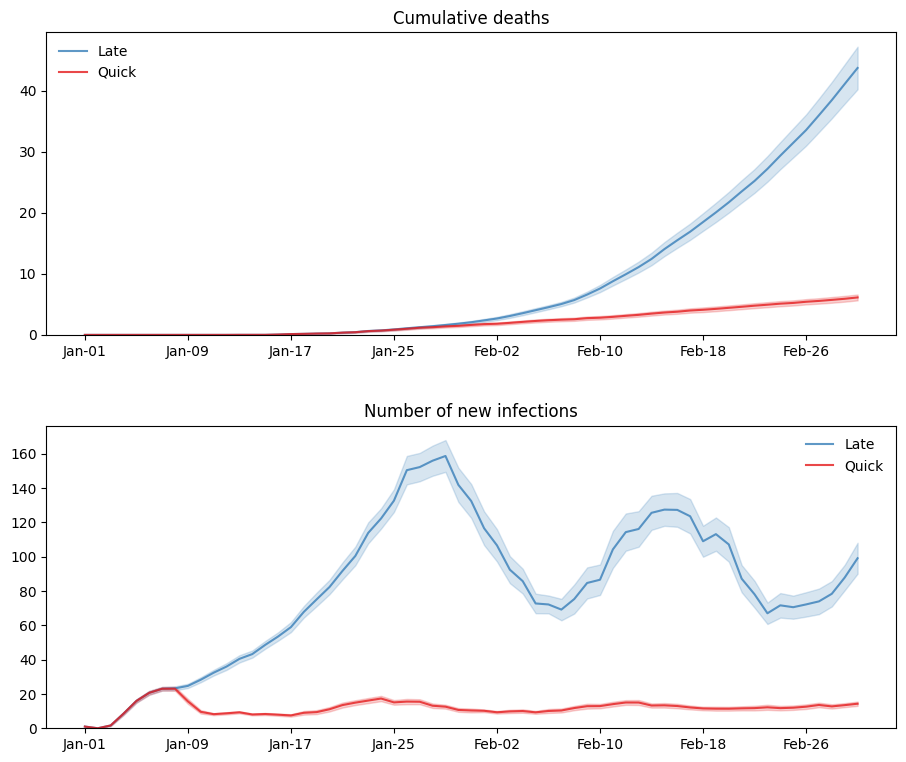

In [2]:
from helpers.what_if_helpers import init_intervention_for_inf_thresh, inf_thresh_callback
changes = [1 / 4, 1.0]  # remove 75 % of contacts
ce_late = cv.clip_edges(days=inf_thresh_callback(1000), changes=changes)
ce_quick = cv.clip_edges(days=inf_thresh_callback(100), changes=changes)
init_intervention_for_inf_thresh(ce_late)
init_intervention_for_inf_thresh(ce_quick)
base_sim = cv.Sim(baseline_pars, interventions=ce_late, label='Late')  # late lockdown
lockdown_sim = cv.Sim(baseline_pars, interventions=ce_quick, label='Quick')
multi_sim = run_base_and_intervention(base_sim, lockdown_sim)
multi_sim.plot(to_plot=["cum_deaths", "new_infections"])